# Concrete Compressive Strength Prediction using Regression model

Abstract: Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients.



Dataset link: https://www.kaggle.com/pavanraj159/concrete-compressive-strength-data-set

Data Set Information:

Number of instances 1030

Number of Attributes 9

Attribute breakdown 8 quantitative input variables, and 1 quantitative output variable


Attribute Information:

Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.


Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output Variable


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [44]:
df = pd.read_csv("C:\\Users\\Sachin acharya\\Downloads\\compresive_strength_concrete.csv",names = ['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate','Age','Concrete compressive strength'],header=0)

In [45]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [46]:
df.shape

(1030, 9)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement                           1030 non-null float64
Blast Furnace Slag               1030 non-null float64
Fly Ash                          1030 non-null float64
Water                            1030 non-null float64
Superplasticizer                 1030 non-null float64
Coarse Aggregate                 1030 non-null float64
Fine Aggregate                   1030 non-null float64
Age                              1030 non-null int64
Concrete compressive strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [48]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [49]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

# Univariate analysis of the features

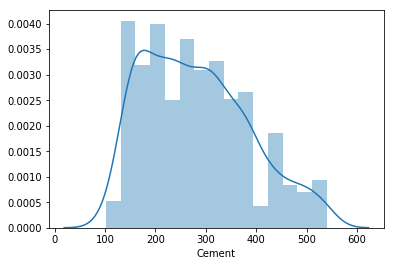

In [50]:
sns.distplot(df['Cement'])

1. Most of the concrete have the cement value between 200 to 400 kg/m^3.
2. The cement content in the data is right skewed and has less outliers.

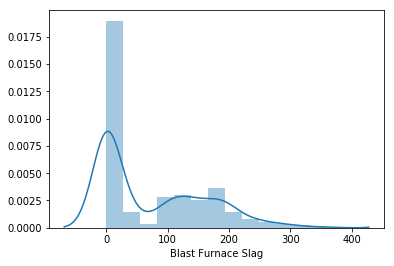

In [51]:
sns.distplot(df['Blast Furnace Slag'])

In [52]:
df['Blast Furnace Slag'].describe()

count    1030.000000
mean       73.895825
std        86.279342
min         0.000000
25%         0.000000
50%        22.000000
75%       142.950000
max       359.400000
Name: Blast Furnace Slag, dtype: float64

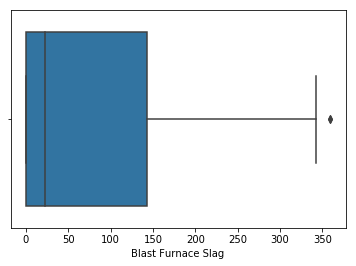

In [53]:
sns.boxplot(df['Blast Furnace Slag'])

1. Most of the concrete comprises of no Blast Furnace Slag or very less Blast Furnace Slag
2. Considering the boxplot, we can say that the data is completely right skewed as many of the concrete produces a high Blast Furnace Slag

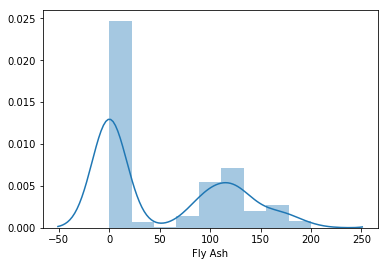

In [54]:
sns.distplot(df['Fly Ash'])

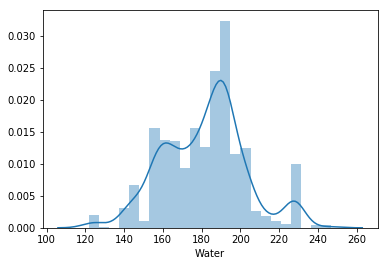

In [55]:
sns.distplot(df['Water'])

In [56]:
df['Water'].describe()

count    1030.000000
mean      181.567282
std        21.354219
min       121.800000
25%       164.900000
50%       185.000000
75%       192.000000
max       247.000000
Name: Water, dtype: float64

1. All concrete have a minimum of 120 kg/m^3 of water content
2. The water content have almost normal distribution with slight right skew

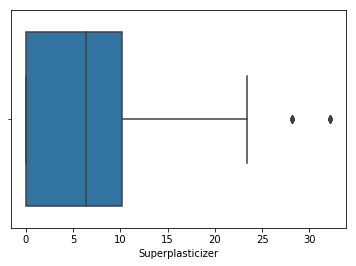

In [57]:
sns.boxplot(df['Superplasticizer'])

In [58]:
df['Superplasticizer'].describe()

count    1030.000000
mean        6.204660
std         5.973841
min         0.000000
25%         0.000000
50%         6.400000
75%        10.200000
max        32.200000
Name: Superplasticizer, dtype: float64

1. The Superplasticizer in the concrete is completely right skewed
2. Most of the concrete have 0 Superplasticizer
3. Very few concrete have a very high Superplasticizer content of 27-32 kg/m^3

(array([ 44.,  85.,  63., 144., 216., 161.,  78., 132.,  58.,  49.]),
 array([ 801. ,  835.4,  869.8,  904.2,  938.6,  973. , 1007.4, 1041.8,
        1076.2, 1110.6, 1145. ]),
 <a list of 10 Patch objects>)

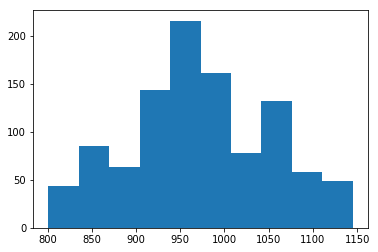

In [59]:
plt.hist(df['Coarse Aggregate'])

1. The course aggregate is normally distributed among all the concrete in the dataset. 
2. A min of 800 kg/m^3 is possessed by all the concrete

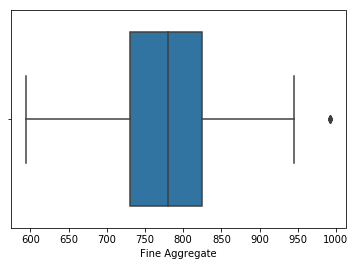

In [60]:
sns.boxplot(df['Fine Aggregate'])

1. The fine aggregate is normally distributed among all the concrete in the dataset. 
2. On an average almost all concrete contains fine aggregate of 750 kg/m^3 

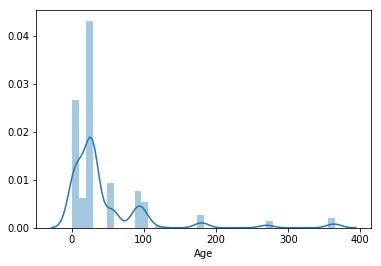

In [61]:
sns.distplot(df['Age'])

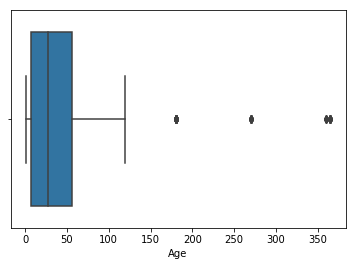

In [62]:
sns.boxplot(df['Age'])

1. The age distribution is highly right skewed
2. Majority of the concrete have their age between 0-50 days

# Multivariate Analysis

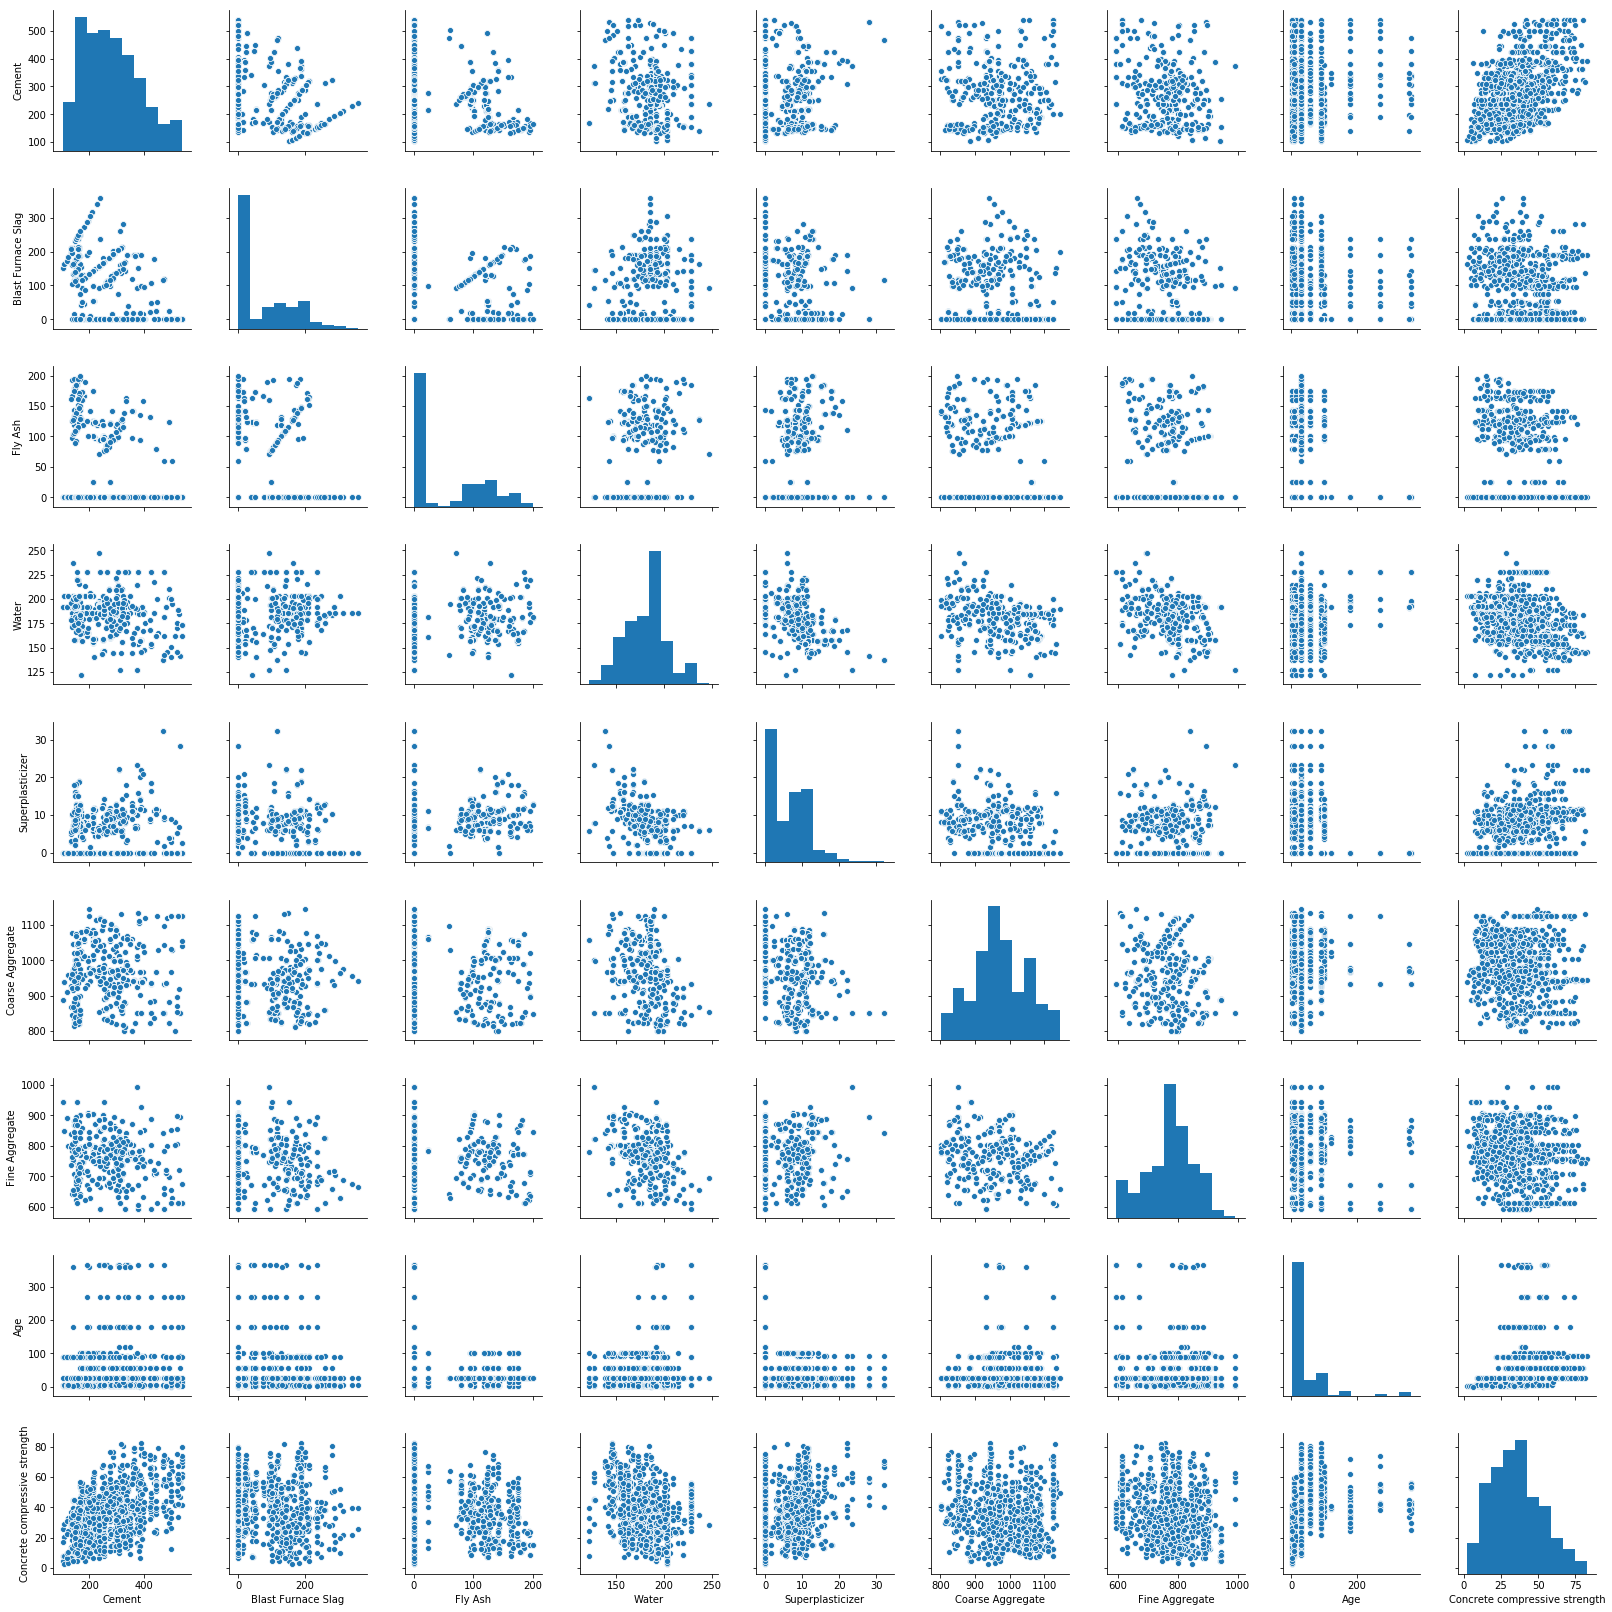

In [63]:
sns.pairplot(df)

# Outlier Treatment

As the data seem to be right skewed w.r.t most the features, the outliers has to be treated.

There are only few outliers and it can be treated with IQR method for better prediction.


In [21]:
Q1=df['Concrete compressive strength'].quantile(0.25)
Q3=df['Concrete compressive strength'].quantile(0.75)
IQR=Q3-Q1
print(IQR)

22.425000000000008


In [22]:
df_new = df[~((df['Concrete compressive strength']<(Q1-1.5*IQR)) | (df['Concrete compressive strength']>(Q3+1.5*IQR)))]

In [23]:
df_new.shape

(1026, 9)

# Checking the assumptions of Linear Regression

In [24]:
x=df_new.drop(['Concrete compressive strength'],axis=1)
y=df_new['Concrete compressive strength'].values

Assumption-1: No auto correlation between the residuals

In [25]:
X_constant=sm.add_constant(x)
X_constant.head()

,const,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
1,1.0,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,1.0,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,1.0,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,1.0,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
5,1.0,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90


In [26]:
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     201.9
Date:                Tue, 01 Oct 2019   Prob (F-statistic):          5.32e-204
Time:                        08:38:36   Log-Likelihood:                -3843.5
No. Observations:                1026   AIC:                             7705.
Df Residuals:                    1017   BIC:                             7749.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -24.2917     26.369     -0.921      0.357     -76.035      27.451
Cement                 0.1188      0.008     14.118      0.000       0.102       0.135
Blast Furnace Slag     0.1025      0.010     10.184      0.000       0.083       0.122
Fly Ash                0.0881      0.012      7.068      0.000       0.064       0.113
Water                 -0.1422      0.040     -3.564      0.000      -0.220      -0.064
Superplasticizer       0.3010      0.093      3.240      0.001       0.119       0.483
Coarse Aggregate       0.0172      0.009      1.847      0.065      -0.001       0.035
Fine Aggregate         0.0210      0.011      1.983      0.048       0.000       0.042
Age                    0.1140      0.005     21.199      0.000       0.103       0.125
==============================================================================
Omnibus:                        6.681   Durbin-Watson:                   1.298
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.746
Skew:                          -0.198   Prob(JB):                       0.0343
Kurtosis:                       2.966   Cond. No.                     1.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Considering the Durbin-Watson constant from the OLS model, we can infer that there is minimum positive correlation between the residuals as it is near to 2.

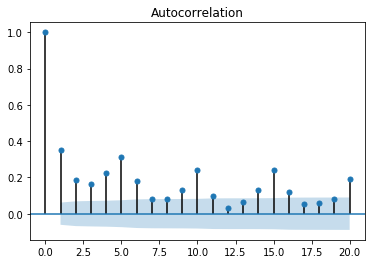

In [27]:
import statsmodels.tsa.api as smt

acf=smt.graphics.plot_acf(lin_reg.resid,lags=20)
acf.show()

The acyclic nature of the residue-graph depicts that there is slight positive auto correlation among the residues.

Assumption-2: Normality in residuals

In [28]:
import seaborn as sns
from scipy import stats

print(stats.jarque_bera(lin_reg.resid))        #Jarque-Bera (JB) test

(6.746174495104976, 0.034283631736723885)


Considering the Jarque-Bera (JB) constant, we can infer that there is normality in the residues as the JB constant is greater than 5.99

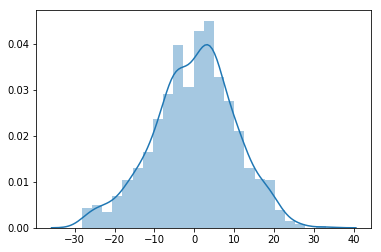

In [29]:
sns.distplot(lin_reg.resid)

The distplot of the residues also depict the normality among the residues.

Assumption 3: Linarity of residuals

In [30]:
# H0 : residuals are linear    Ha: residuals are not linear
import statsmodels.api as sm

sm.stats.diagnostic.linear_rainbow(res=lin_reg)    #rainbow test

(1.1669160572652164, 0.04110433280016708)

Considering the p-value from the rainbow test, we can infer that the null-hypothesis fails to reject and the residuals are linear.

In [31]:
lin_reg.resid.mean()

3.2261825872694216e-13

The mean of the residuals are also very near to zero and emphasises that the residuals are linear

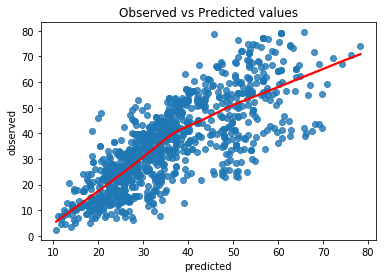

In [32]:
fitted_vals = lin_reg.predict()
resids = lin_reg.resid
sns.regplot(x=fitted_vals,y=y,lowess=True,line_kws={'color':'red'})
plt.title('Observed vs Predicted values')
plt.xlabel('predicted')
plt.ylabel('observed')
plt.show()

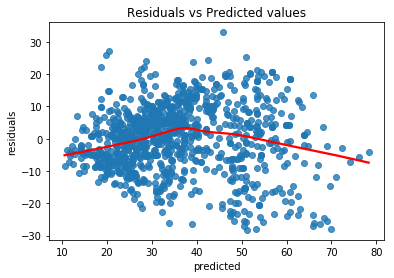

In [33]:
sns.regplot(x=fitted_vals,y=resids,lowess=True,line_kws={'color':'red'})
plt.title('Residuals vs Predicted values')
plt.xlabel('predicted')
plt.ylabel('residuals')
plt.show()

Even the above graphs depicts the linarity among the residuals.

Assumption 4: No Hetroscedasticity among the residuals

In [34]:
#H0: residuals are homoscedastic     Ha: residuals are hetroscedastic
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name=['F_statistic','p-value']                #Beusch-Wagon Test(Gold-feld test)
test=sms.het_goldfeldquandt(lin_reg.resid,lin_reg.model.exog)
lzip(name,test)

[('F_statistic', 0.5007445359795532), ('p-value', 0.9999999999999923)]

Considering the p-value from the Beusch-Wagon Test(Gold-feld test), the null-hypothesis fails to reject and the residues are considered to be hetroscedastic in nature

Assumption 5: No strong Multicolliniarity

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values,i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif':vif[1:]},index=x.columns)

,vif
Cement,7.449261
Blast Furnace Slag,7.253121
Fly Ash,6.165845
Water,7.001885
Superplasticizer,2.967604
Coarse Aggregate,5.067455
Fine Aggregate,7.002447
Age,1.119236


Considering the vif values, we can infer that there is strong multicolliniarity among the features except a few of them.

# Feature selection

# Using Pearson Correlation

                                 Cement  Blast Furnace Slag   Fly Ash  \
Cement                         1.000000           -0.277924 -0.395957   
Blast Furnace Slag            -0.277924            1.000000 -0.322432   
Fly Ash                       -0.395957           -0.322432  1.000000   
Water                         -0.077710            0.110473 -0.261653   
Superplasticizer               0.091623            0.038050  0.381691   
Coarse Aggregate              -0.112237           -0.285285 -0.008232   
Fine Aggregate                -0.220075           -0.280446  0.076699   
Age                            0.082244           -0.045811 -0.154373   
Concrete compressive strength  0.495634            0.127549 -0.098350   

                                  Water  Superplasticizer  Coarse Aggregate  \
Cement                        -0.077710          0.091623         -0.112237   
Blast Furnace Slag             0.110473          0.038050         -0.285285   
Fly Ash                       -0

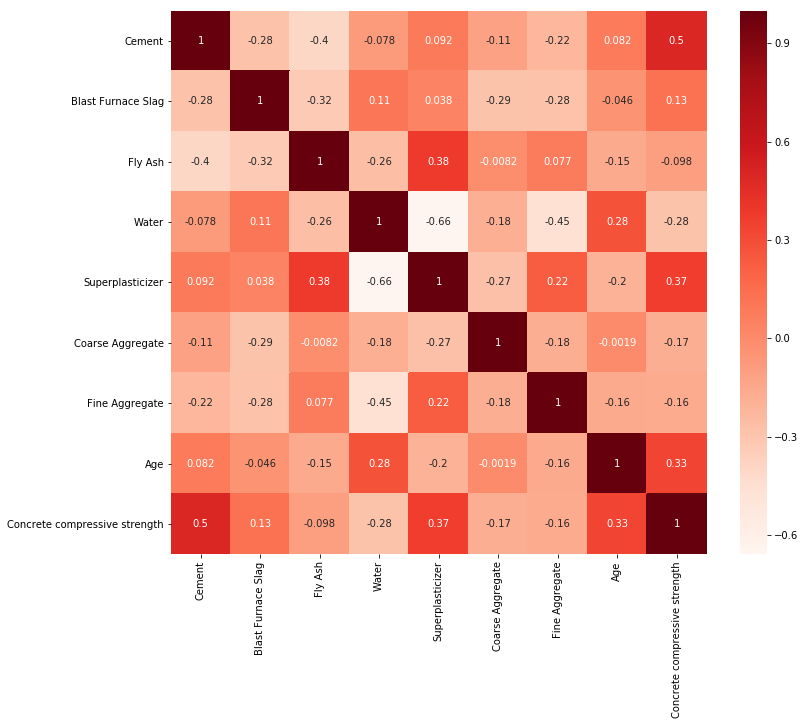

In [36]:
plt.figure(figsize=(12,10))
cor = df_new.corr()
print(cor)
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

By considering the correlation matrix, we can infer that there is no much correlation among the features and all the features can be considered for building the model.

# Building the regression model

In [37]:
from sklearn.linear_model import LinearRegression

LM= LinearRegression()
LM.fit(x,y)

print(f'coefficients:{LM.coef_}')
print(f'intercept: {LM.intercept_}')
print(f'R^2 score: {LM.score(x,y)}')

coefficients:[ 0.11875765  0.1024576   0.08813199 -0.14217137  0.30099576  0.01720681
  0.02104118  0.11397467]
intercept: -24.291699307894447
R^2 score: 0.6135887215612105


In [38]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [39]:
LM= LinearRegression()
model=LM.fit(x_train,y_train)

print(f'r^2 score for train set: {LM.score(x_train,y_train)}')
print(f'r^2 score for test set: {LM.score(x_test,y_test)}')

r^2 score for train set: 0.6250680130514656
r^2 score for test set: 0.5749873557209382


The r^2 values for both train data and test data is approximately same and can be considered for prediction

In [40]:
y_pred = LM.predict(x_test)

In [41]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test,y_pred)
print('mae :',mae)
mse =metrics.mean_squared_error(y_test,y_pred)
print('mse :',mse)
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('rmse :',rmse)

mae : 7.971925190132932
mse : 98.9709389484664
rmse : 9.948413891091706


The RMSE value depicts that the errors produced in the prediction is very minimum and can be considered as the good model but can be improved for better r^2 value

# Regularization of Linear model

In [42]:
from sklearn.model_selection import train_test_split
y = df['Concrete compressive strength']
X = df.drop(['Concrete compressive strength'],axis=1)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


#Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train),
                              columns = X_train.columns)
X_train_scaled.head()


#We will save the model performance metrics in a DataFrame
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
Model = []
RMSE = []
R_sq = []
cv = KFold(5, random_state = 1)


#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, X, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, X, y, cv=cv,
                                               scoring='neg_mean_squared_error').mean()))
    R_sq.append(cross_val_score(model, X, y, cv=cv, scoring='r2').mean())


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,
                              AdaBoostRegressor)
names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor',
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [LinearRegression(), Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(),
          AdaBoostRegressor()]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, X_train_scaled, y_train)
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'R Squared': R_sq})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation


FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE,R Squared
0,Linear Regression,10.655513,0.596628
1,Ridge Regression,10.652831,0.596935
2,Lasso Regression,11.116726,0.561457
3,K Neighbors Regressor,9.460496,0.675249
4,Decision Tree Regressor,7.174531,0.791896
5,Random Forest Regressor,5.480732,0.884149
6,Gradient Boosting Regressor,5.408340,0.894653
7,Adaboost Regressor,7.644784,0.787998


By considering the RMSE and R^2 value, we can conclude that Gradient Boosting Regressor can predict the Concrete compressive strength by using all the features.